# Fake News vs Satire

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
import os

df = pd.read_excel('data/fake_news_stories.xlsx')

# Short analysis showed that there are two satire labels: 'Satire' and 'Satire '
df['Fake or Satire?'] = df['Fake or Satire?'].apply(lambda x: x.strip())


def fill_data(row: pd.DataFrame) -> pd.DataFrame:
    """
    Fill title and content data to specific row.
    
    :param row: one row of dataframe to process.
    :return: row of dataframe with filled fields.
    """
    label = row['Fake or Satire?']
    article_number = row['Article Number']
    content_path = f'data/story_text/{label}/final{label}/{article_number}.txt'
    
    if not os.path.exists(content_path):
        return row

    with open(f'data/story_text/{label}/final{label}/{article_number}.txt', 'r', encoding='utf8', errors='ignore') as f:
        title = f.readline()
        _ = f.readline()  # URL is read, but it is already present in dataset
        content = f.read()
        row['Title'] = str(title)
        row['Content'] = str(content)
    return row

df = df.apply(lambda row: fill_data(row), axis=1)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(492, 7)

Overview of the data:

In [6]:
df.head()

,Article Number,Content,Fake or Satire?,Fake or Satire?.1,Title,URL of article,URL of rebutting article
0,375,The Centers for Disease Control (CDC) has prop...,Fake,Fake,CDC Proposes Rule to Apprehend and Detain anyo...,http://www.redflagnews.com/headlines-2016/cdc-...,http://www.snopes.com/cdc-forced-vaccinations/
1,376,CONSERVATIVE TRIBUNE\nThere are many conspirac...,Fake,Fake,OUTRAGE: What Obama Just Did to the White Hous...,http://www.redflagnews.com/headlines-2016/-out...,http://www.snopes.com/white-house-logo-change/
2,377,"Now, we know it's bad! The FBI Director's anno...",Fake,Fake,White House CANCELS all Obama Appearances at H...,http://www.redflagnews.com/headlines-2016/whit...,http://www.snopes.com/obama-veterans-money-to-...
3,378,Veteran Affairs is one of the most mismanaged ...,Fake,Fake,Obama Cuts 2.6 Billion From Veterans While All...,http://www.redflagnews.com/headlines-2016/obam...,http://www.snopes.com/obama-veterans-money-to-...
4,379,A landmark bill allowing for the prosecution o...,Fake,Fake,California Introduces Law To Jail Anyone Who Q...,http://www.redflagnews.com/headlines-2016/cali...,http://www.snopes.com/california-to-jail-clima...


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

Article Number               int64
Content                     object
Fake or Satire?             object
Fake or Satire?.1           object
Title                       object
URL of article              object
URL of rebutting article    object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,Article Number
count,492.000000
mean,289.792683
std,169.817410
min,2.000000
25%,138.750000
50%,296.500000
75%,432.250000
max,595.000000


In [9]:
df.describe(exclude=[np.number])

,Content,Fake or Satire?,Fake or Satire?.1,Title,URL of article,URL of rebutting article
count,484,492,492,484,492,295
unique,484,2,3,474,489,256
top,"One unidentified officer in Charlottesville, V...",Fake,Fake,Edward Snowden: Osama Bin Laden is Still Alive...,http://prntly.com/2017/01/24/intel-institute-m...,http://www.snopes.com/hillary-clinton-has-park...
freq,1,291,291,2,2,4


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

Content: 8 (1.63%)
Title: 8 (1.63%)
URL of rebutting article: 197 (40.04%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


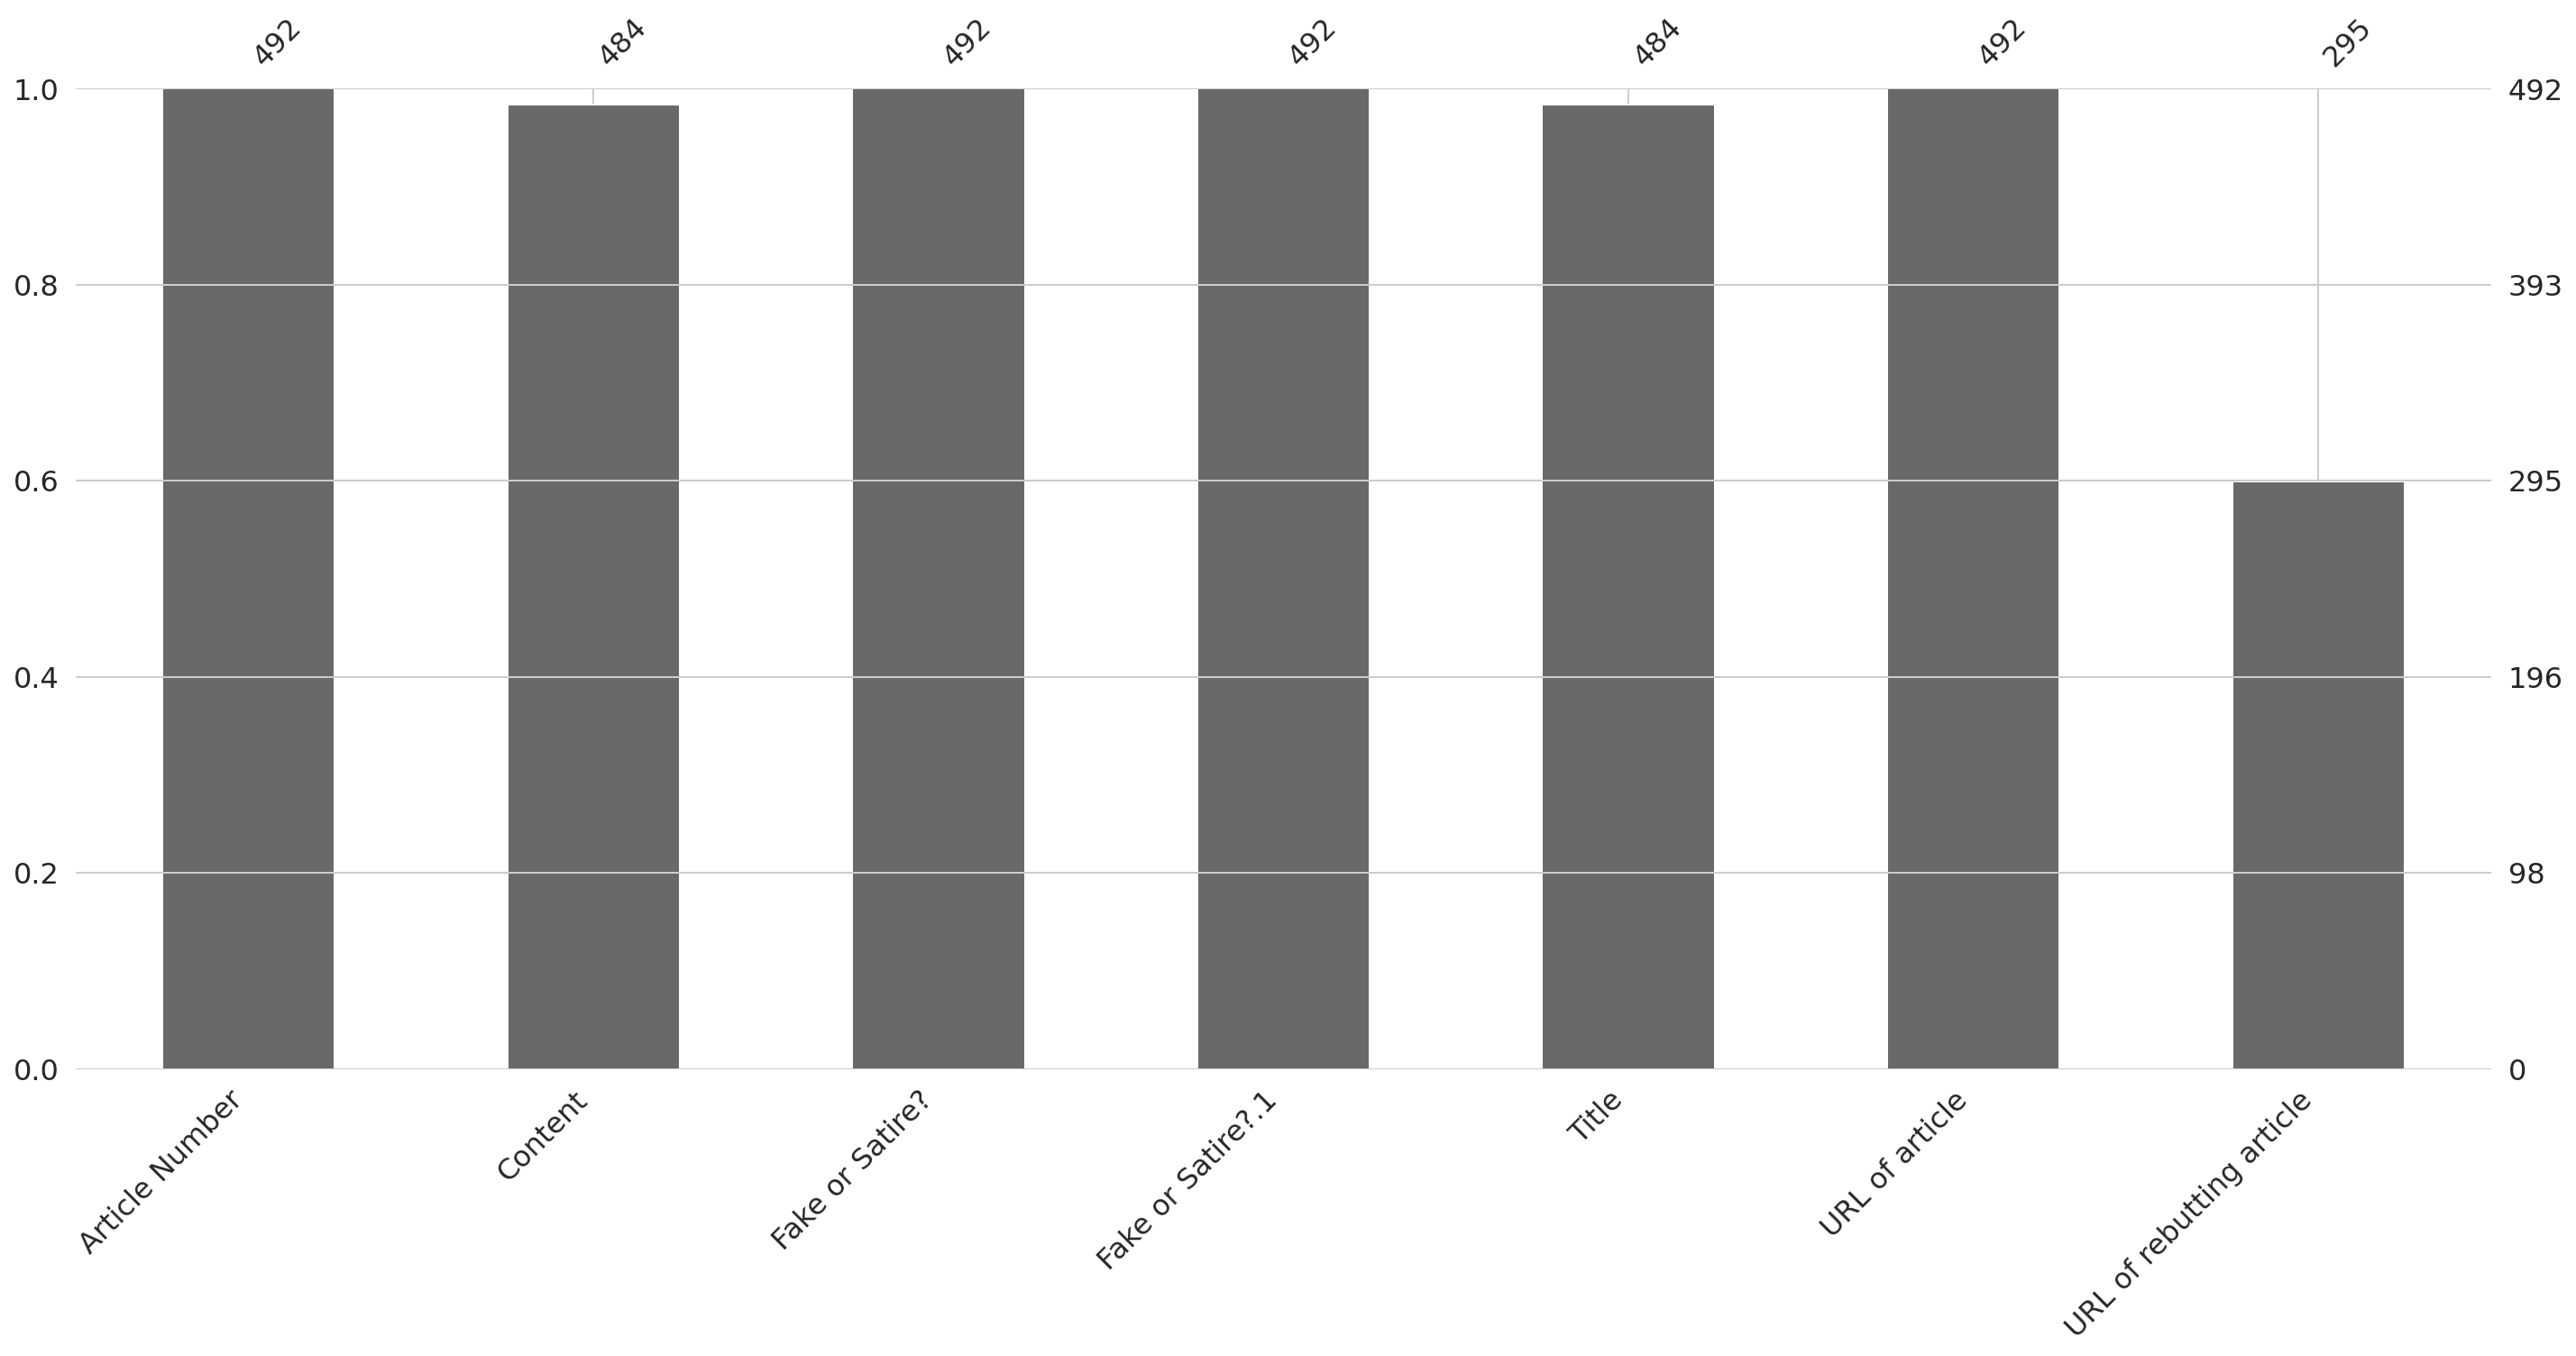

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'Article Number', 'URL of article', 'URL of rebutting article', 'Fake or Satire?.1'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'Title', 'Content'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'Fake or Satire?' # attribute considered as "label"

### Label attribute distribution

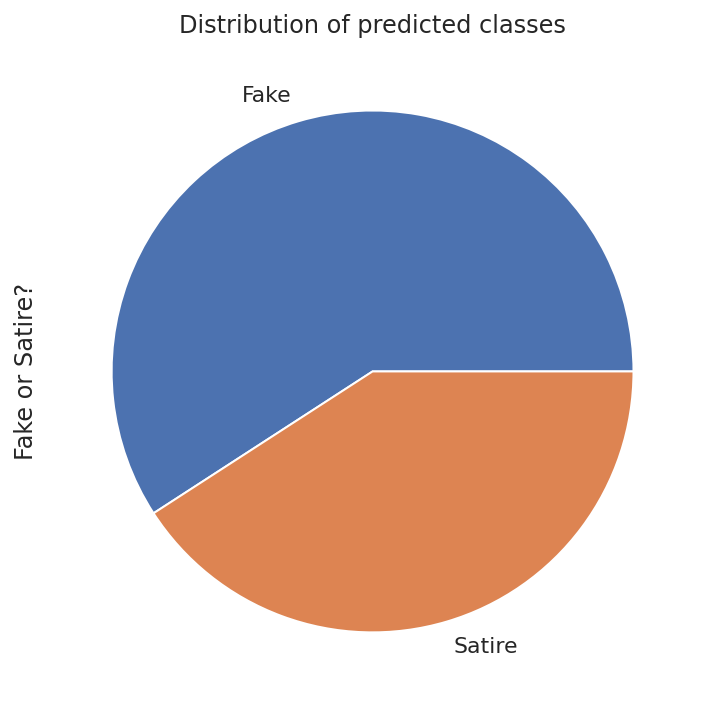

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

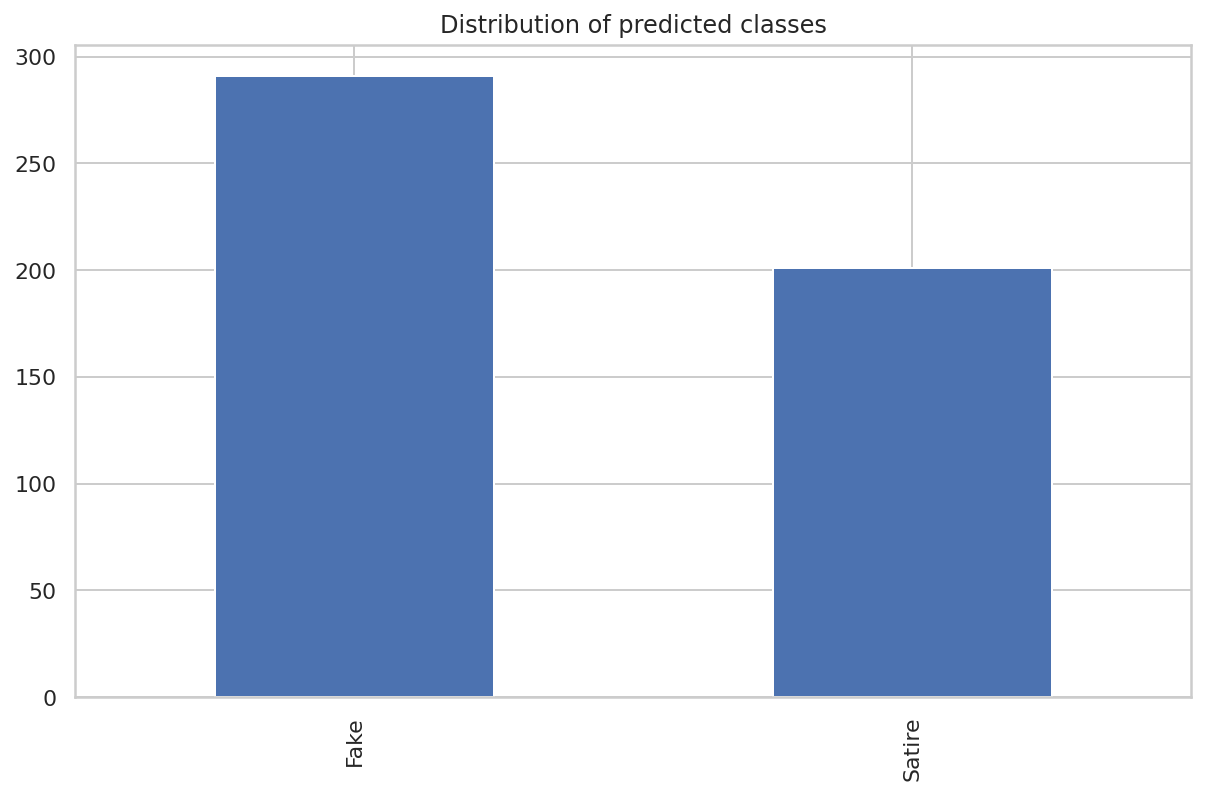

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "Title"


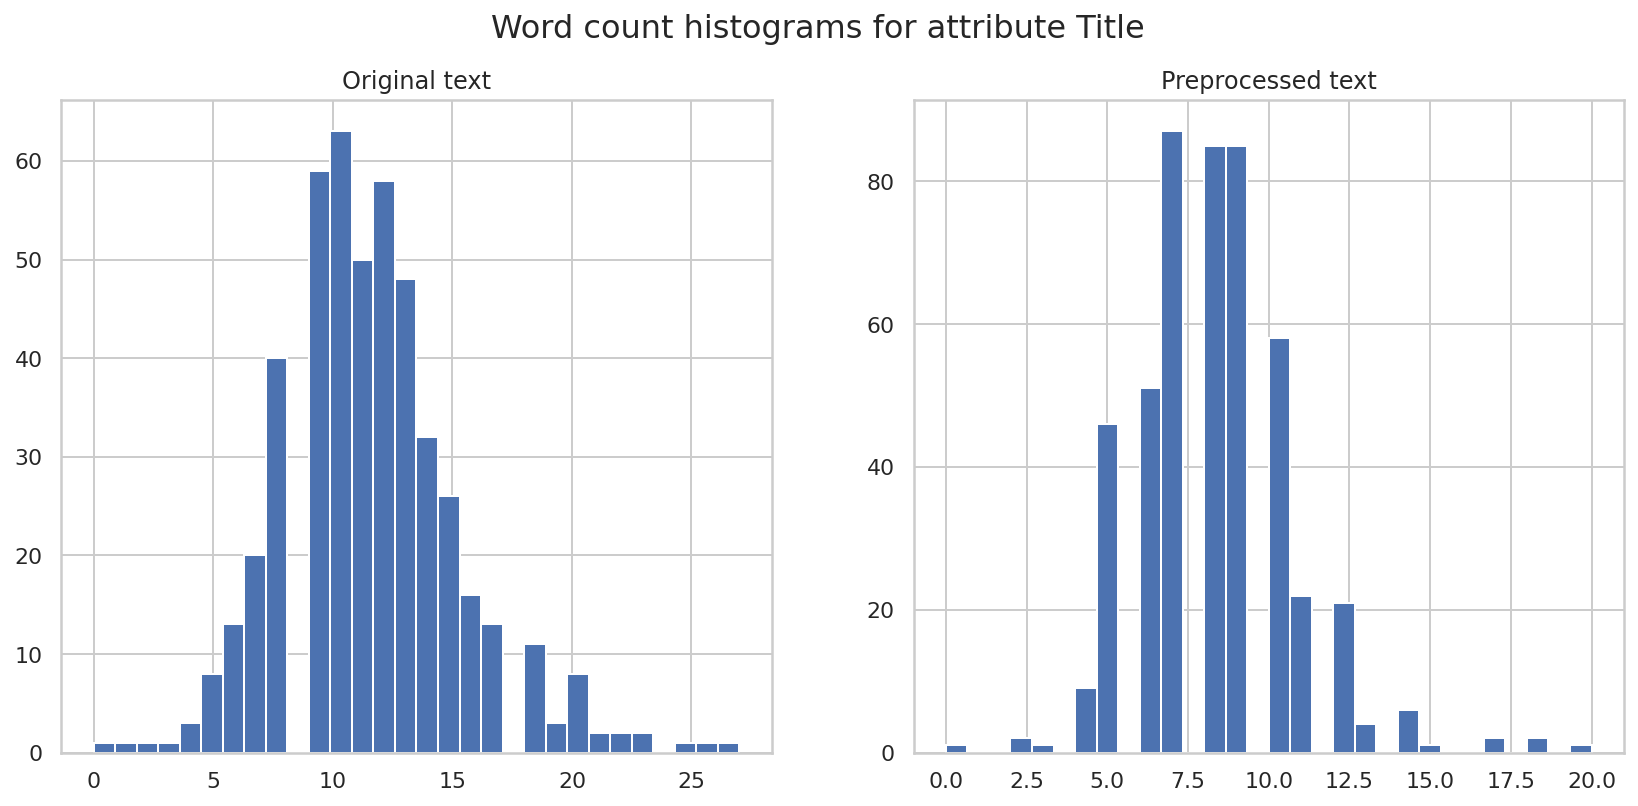

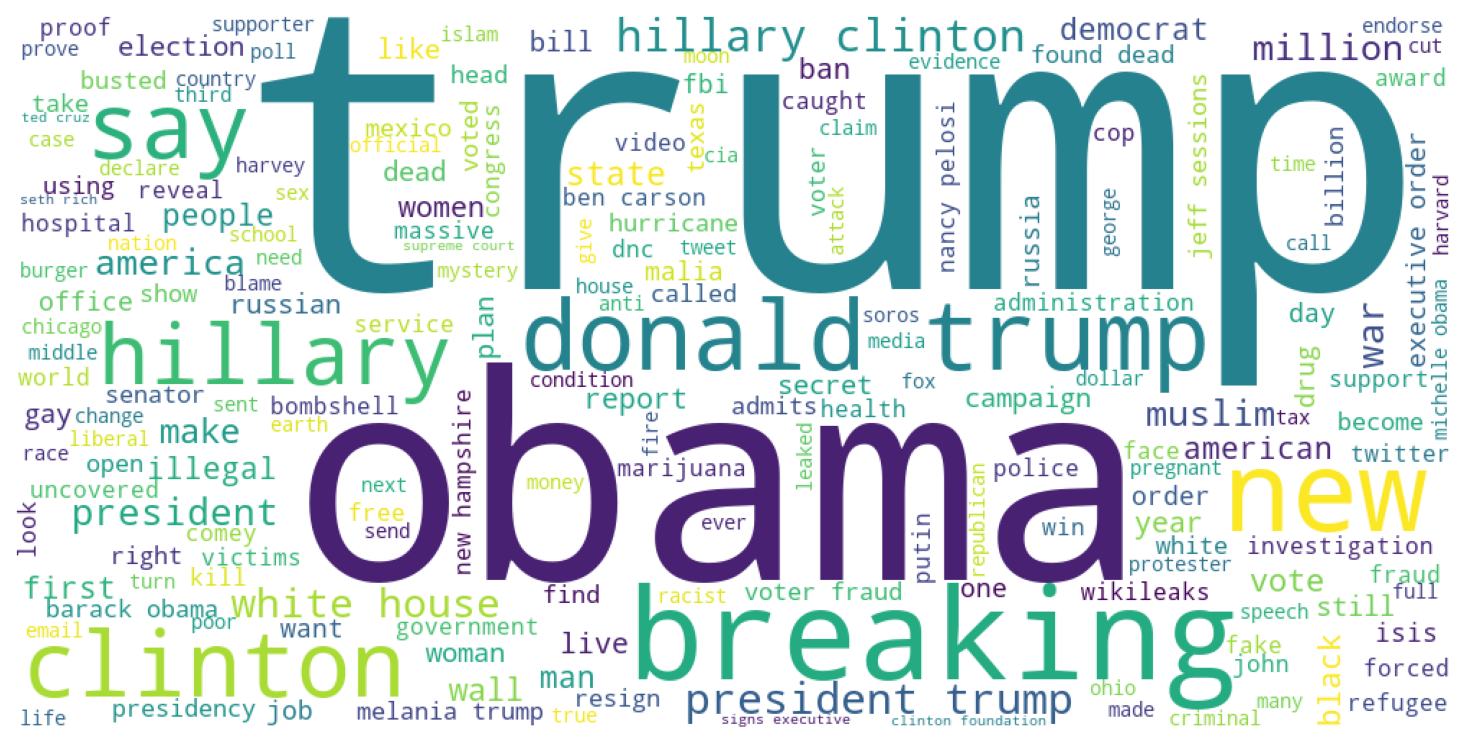



Analysis of attribute "Content"


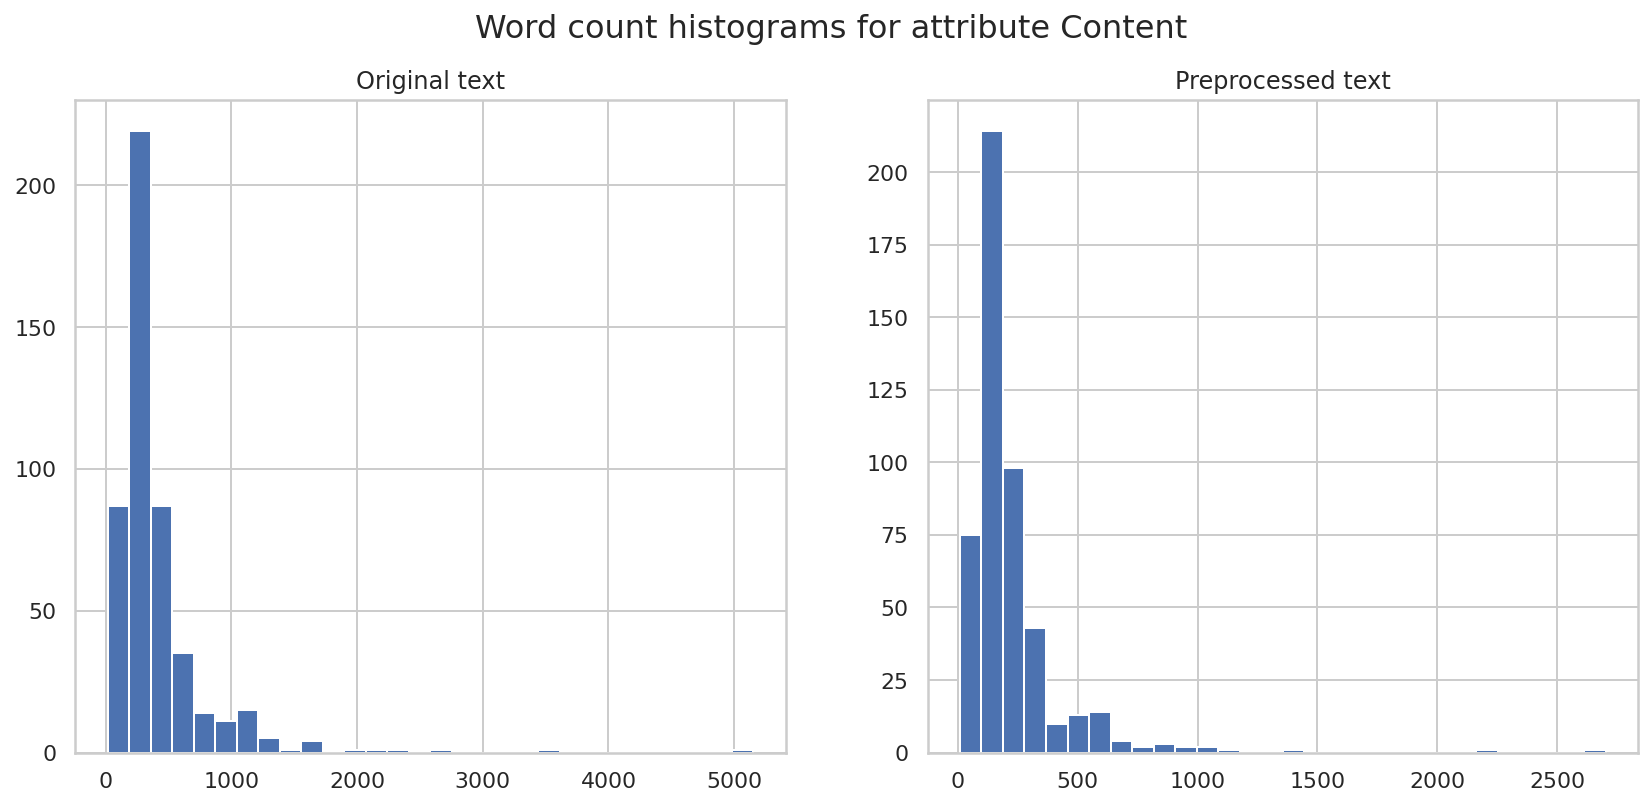

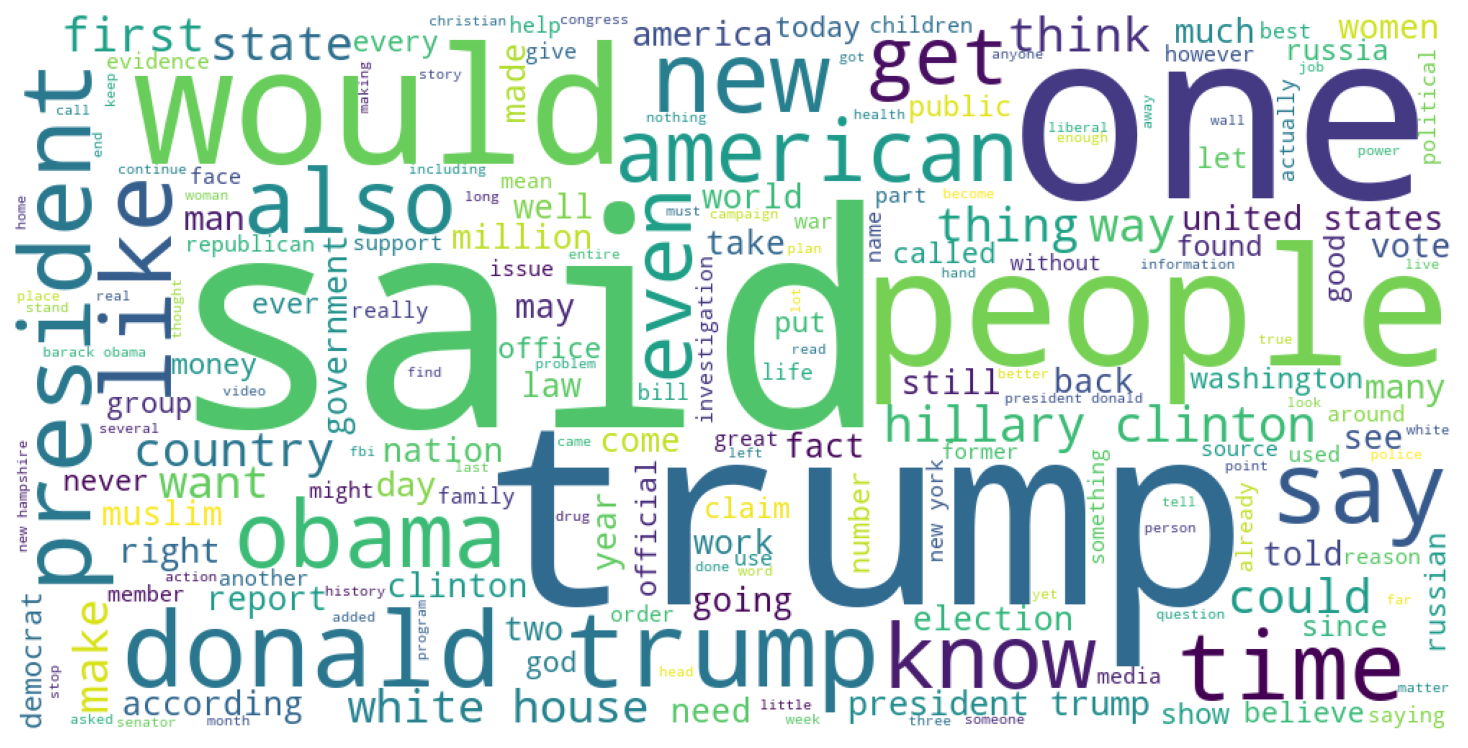

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)